In [1]:
# unit test
import unittest

from PIL import Image, ImageDraw

import numpy as np

import torch
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt

import math

# "helper" needs to be part of sys path
import sys
sys.path.insert(0, "helper")
sys.path.insert(0, "/helper")
sys.path.insert(0, "./helper")
sys.path.insert(0, "../helper")
print(sys.path)

%load_ext autoreload
%autoreload 2

# own module
from dataset.meanteacher import MeanTeacherTrainDataset, MeanTeacherValDataset

['../helper', './helper', '/helper', 'helper', 'C:\\Users\\Christina\\Documents\\datasceyence\\examples', 'C:\\Users\\Christina\\anaconda3\\envs\\chrisy\\python39.zip', 'C:\\Users\\Christina\\anaconda3\\envs\\chrisy\\DLLs', 'C:\\Users\\Christina\\anaconda3\\envs\\chrisy\\lib', 'C:\\Users\\Christina\\anaconda3\\envs\\chrisy', '', 'C:\\Users\\Christina\\anaconda3\\envs\\chrisy\\lib\\site-packages', 'C:\\Users\\Christina\\anaconda3\\envs\\chrisy\\lib\\site-packages\\pixelssl-0.1.4-py3.9.egg', 'C:\\Users\\Christina\\anaconda3\\envs\\chrisy\\lib\\site-packages\\win32', 'C:\\Users\\Christina\\anaconda3\\envs\\chrisy\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Christina\\anaconda3\\envs\\chrisy\\lib\\site-packages\\Pythonwin']


In [2]:
class UnitTestLoss(unittest.TestCase):

    def test_item_labelled(self):
        
        #csv_filenames = ["../data_prep/mt_data_ichallenge_unlabelled.csv"] 
        #csv_filenames = ["../data_prep/mt_data_ichallenge_non_amd.csv"] 
        #csv_filenames = ["../data_prep/mt_data_ichallenge_amd.csv"] 
        #csv_filenames = ["../data_prep/mt_data_ichallenge_glaucoma.csv"]
        csv_filenames = ["../data_prep/mt_data_plex.csv", "../data_prep/mt_data_ichallenge_amd.csv", "../data_prep/mt_data_cirrus.csv"]
        
        mtd = MeanTeacherTrainDataset(mode="train", image_size=512, csv_filenames=csv_filenames)
        item = mtd.__getitem__(index=800)
        print("item")
        print(item)
    
        fig, (ax1, ax2) = plt.subplots(1, 2)
        ax1.set_title('img')
        ax2.set_title('msk')
        ax1.imshow(item["img"].permute(1, 2, 0), cmap="gray")
        ax2.imshow(item["msk"].permute(1, 2, 0), cmap="gray")
        

        #print("Checks")
        #print(torch.sum(torch.isnan(item["msk"])))
        #print(torch.isnan(item["msk"]))
        #print(item["msk"] != item["msk"]) # math.nan
        #print(item["msk"])
        
    def test_item_unlabelled(self):
        
        #csv_filenames = ["../data_prep/mt_data_ichallenge_unlabelled.csv"] 
        #csv_filenames = ["../data_prep/mt_data_ichallenge_non_amd.csv"] 
        #csv_filenames = ["../data_prep/mt_data_ichallenge_amd.csv"] 
        #csv_filenames = ["../data_prep/mt_data_ichallenge_glaucoma.csv"]
        csv_filenames = ["../data_prep/mt_data_cirrus.csv"]
        
        mtd = MeanTeacherTrainDataset(mode="train", image_size=512, csv_filenames=csv_filenames)
        item = mtd.__getitem__(index=300)
        print("item")
        print(item)
    
        fig, (ax1, ax2) = plt.subplots(1, 2)
        
        ax1.set_title('img')
        ax2.set_title('msk')
        ax1.imshow(item["img"].permute(1, 2, 0), cmap="gray")
        ax2.imshow(item["msk"].permute(1, 2, 0), cmap="gray")
        
        #print("Checks")
        #print(torch.sum(torch.isnan(item["msk"])))
        #print(torch.isnan(item["msk"]))
        #print(item["msk"] != item["msk"]) # math.nan
        #print(item["msk"])

C:\Users\Christina\Documents\datasceyence\examples\../helper\dataset\template.py:39: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  self.csv_data = pd.concat(csv_list, axis=0, ignore_index=False)


(2056, 2124)
uint8
2
2


.E
ERROR: test_item_unlabelled (__main__.UnitTestLoss)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\Christina\anaconda3\envs\chrisy\lib\site-packages\pandas\core\indexes\base.py", line 3802, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 138, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 165, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5745, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5753, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'msk_path'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\Christina\AppData\Local\Temp\ipykernel_16872\1288138243.py", line 37, in test_item_unlabelled
    mtd = MeanTeacherTrainDataset(mode="

item
{'img': tensor([[[0.6616, 0.6566, 0.6667,  ..., 0.6919, 0.7020, 0.6970],
         [0.6616, 0.6667, 0.6768,  ..., 0.6616, 0.6869, 0.7020],
         [0.6818, 0.6919, 0.6818,  ..., 0.6465, 0.6667, 0.6970],
         ...,
         [0.6818, 0.6616, 0.6616,  ..., 0.6515, 0.6465, 0.6768],
         [0.6768, 0.6869, 0.6970,  ..., 0.6465, 0.6515, 0.6566],
         [0.6869, 0.6970, 0.7071,  ..., 0.6667, 0.6818, 0.6768]],

        [[0.6616, 0.6566, 0.6667,  ..., 0.6919, 0.7020, 0.6970],
         [0.6616, 0.6667, 0.6768,  ..., 0.6616, 0.6869, 0.7020],
         [0.6818, 0.6919, 0.6818,  ..., 0.6465, 0.6667, 0.6970],
         ...,
         [0.6818, 0.6616, 0.6616,  ..., 0.6515, 0.6465, 0.6768],
         [0.6768, 0.6869, 0.6970,  ..., 0.6465, 0.6515, 0.6566],
         [0.6869, 0.6970, 0.7071,  ..., 0.6667, 0.6818, 0.6768]],

        [[0.6616, 0.6566, 0.6667,  ..., 0.6919, 0.7020, 0.6970],
         [0.6616, 0.6667, 0.6768,  ..., 0.6616, 0.6869, 0.7020],
         [0.6818, 0.6919, 0.6818,  ..., 0.646

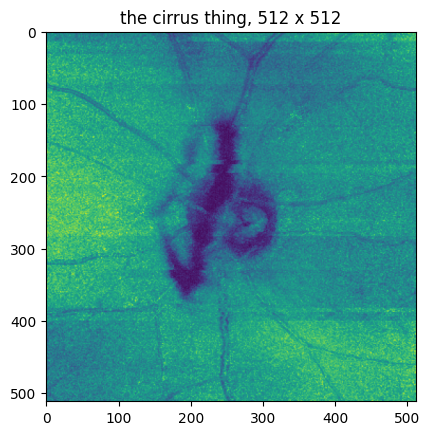

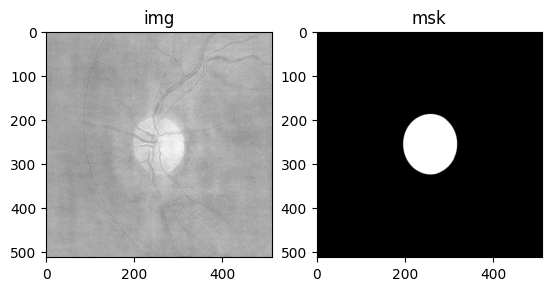

In [3]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)